In [1]:
from ArxivEquationScraping import *
from EquationFiltering import *
from PictureGenerator import *

#### - Scraping ArXiv for STEM-category papers:

In [2]:
nr_papers = 10
STEM_category = 'physics'
download_directory = "arxiv_papers/"
download_arxiv_papers(STEM_category, nr_papers, download_dir=download_directory)

======= Downloading: 10 (out of 1438) papers in category: 'physics' in YY/MM: 2303 =======


#### - Extracting .tex files from papers and deleting other files:

In [3]:
unpack_tex_files(download_directory=download_directory)

 ===== Handling file nr: 1 with id: .DS_Store =====
 ===== Handling file nr: 2 with id: 2303.00072 =====
 File nr: 2 with id: 2303.00072 - contains '.tex' file: 
Extracting main.tex as main.tex
 ===== Handling file nr: 3 with id: 2303.00081 =====
 File nr: 3 with id: 2303.00081 - contains '.tex' file: 
Extracting main.tex as main_1.tex
 ===== Handling file nr: 4 with id: 2303.00059 =====
 File nr: 4 with id: 2303.00059 - contains '.tex' file: 
Extracting PoP_LRRC.tex as PoP_LRRC.tex
 ===== Handling file nr: 5 with id: 2303.00061 =====
 Deleting file nr: 5 with id: 2303.00061 - no '.tex' file found...
 ===== Handling file nr: 6 with id: 2303.00033 =====
 File nr: 6 with id: 2303.00033 - contains '.tex' file: 
Extracting main.tex as main_2.tex
 ===== Handling file nr: 7 with id: 2303.00114 =====
 Deleting file nr: 7 with id: 2303.00114 - no '.tex' file found...
 ===== Handling file nr: 8 with id: 2303.00104 =====
 Deleting file nr: 8 with id: 2303.00104 - no '.tex' file found...
 ===== H

#### - Scraping .tex files for equations:

In [4]:
file_names = [download_directory+file_name for file_name in os.listdir(download_directory) if file_name != ".DS_Store"]
output_file_name = "scraped_equations.txt"
math_scraper(input_names=file_names,output_name=output_file_name)

100%|██████████| 7/7 [00:00<00:00, 1346.36it/s]

==== Scraped: 794 equations, and saved to: scraped_equations.txt ====


#### - Filtering equations for unwanted tokens and illegitimate math expressions:


In [5]:
nr_equations = 50
original_filename = output_file_name
filtered_formulas = filter_formulas(in_filename=original_filename,
                                    nr_equations=50)
print("Now has: ", len(filtered_formulas), " formulas")

100%|██████████| 55/55 [00:09<00:00,  5.58it/s]

Now has:  29  formulas


##### Save filtered equations to file:


In [6]:
# Writing the chosen equations to a file locally (same order as pictures)
new_filename = 'filtered_equations.txt'
save_filtered_formulas(filtered_formulas=filtered_formulas,out_filename=new_filename)

##### Show one of the extracted equations:

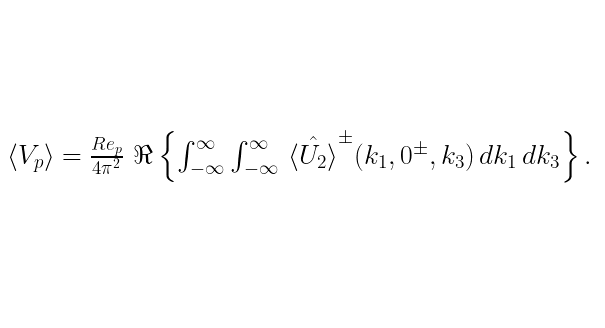

In [7]:
render_and_show(filtered_formulas[13])

#### - Rendering equations to A4 sized transparent .png files and saving locally:


In [8]:
for line_nr in tqdm(range(len(filtered_formulas))):
    location = 'EquationRenders/'
    filename = f'eq_{line_nr}'
    latex_to_image(math_expr=filtered_formulas[line_nr], file_name=filename, location=location)

100%|██████████| 29/29 [00:24<00:00,  1.16it/s]
